In [20]:
from timeit import time
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from pprint import pprint
plt.style.use('seaborn-bright')
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.25

def set_np_pretty_mode():
    np.set_printoptions(suppress=True, formatter={'float_kind':'{:8.4f}'.format}, linewidth=130)
def set_np_default():
    np.set_printoptions(edgeitems=3,infstr='inf', linewidth=75, nanstr='nan', precision=8, suppress=False, threshold=1000, formatter=None)

# Problem 2

## Part A

In [3]:
def gaussian_elim(A):
    A_cop = A.copy()
    for active_row in range(0, A_cop.shape[0] - 1):
        for row in range(active_row + 1, A_cop.shape[0]):
            A_cop[row, :] = A_cop[row, :] - A_cop[active_row, :]*A_cop[row, active_row] / A_cop[active_row, active_row]
    return A_cop

def back_sub(A):
    x = np.zeros((A.shape[0], 1))
    x[-1] = A[-1, -1] / A[-1, -2]
    for i in range(A.shape[0] - 2, -1, -1):
        x[i] = (A[i, -1] - np.dot(x[i + 1:].T, A[i, i+1:-1])) / A[i, i]
        
    return x


def my_solve(A, b, disp=False):
    assert A.shape[0] == A.shape[1], "A must be square!"
    assert A.shape[0] == b.shape[0], "A and b dimenstions must match!"

    upper_traingular = gaussian_elim(np.concatenate((A.T, b.T)).T)
    
    if disp:
        pprint(upper_traingular)

    return back_sub(upper_traingular)

## Part B

In [4]:
def create_matrix(n):
    mat = np.zeros((n, n))
    for i in range(1, n+1):
        for j in range(1, n+1):
            mat[i - 1, j - 1] = np.cos((i - 1)*(j - (1/2))*np.pi / n)
    return mat

In [5]:
dct2 = create_matrix(10)
set_np_pretty_mode()
pprint(dct2)

array([[  1.0000,   1.0000,   1.0000,   1.0000,   1.0000,   1.0000,   1.0000,   1.0000,   1.0000,   1.0000],
       [  0.9877,   0.8910,   0.7071,   0.4540,   0.1564,  -0.1564,  -0.4540,  -0.7071,  -0.8910,  -0.9877],
       [  0.9511,   0.5878,   0.0000,  -0.5878,  -0.9511,  -0.9511,  -0.5878,  -0.0000,   0.5878,   0.9511],
       [  0.8910,   0.1564,  -0.7071,  -0.9877,  -0.4540,   0.4540,   0.9877,   0.7071,  -0.1564,  -0.8910],
       [  0.8090,  -0.3090,  -1.0000,  -0.3090,   0.8090,   0.8090,  -0.3090,  -1.0000,  -0.3090,   0.8090],
       [  0.7071,  -0.7071,  -0.7071,   0.7071,   0.7071,  -0.7071,  -0.7071,   0.7071,   0.7071,  -0.7071],
       [  0.5878,  -0.9511,  -0.0000,   0.9511,  -0.5878,  -0.5878,   0.9511,   0.0000,  -0.9511,   0.5878],
       [  0.4540,  -0.9877,   0.7071,   0.1564,  -0.8910,   0.8910,  -0.1564,  -0.7071,   0.9877,  -0.4540],
       [  0.3090,  -0.8090,   1.0000,  -0.8090,   0.3090,   0.3090,  -0.8090,   1.0000,  -0.8090,   0.3090],
       [  0.1564,  

In [6]:
x_true = np.linspace(1, 10, 10).reshape(10, 1)
b = np.dot(dct2, x_true)

In [7]:
scipy.linalg.solve(dct2, b)

array([[  1.0000],
       [  2.0000],
       [  3.0000],
       [  4.0000],
       [  5.0000],
       [  6.0000],
       [  7.0000],
       [  8.0000],
       [  9.0000],
       [ 10.0000]])

In [8]:
x = my_solve(dct2, b, True)
pprint(x)

array([[  1.0000,   1.0000,   1.0000,   1.0000,   1.0000,   1.0000,   1.0000,   1.0000,   1.0000,   1.0000,  55.0000],
       [  0.0000,  -0.0967,  -0.2806,  -0.5337,  -0.8313,  -1.1441,  -1.4417,  -1.6948,  -1.8787,  -1.9754, -74.5030],
       [  0.0000,   0.0000,   0.1032,   0.4665,   1.2212,   2.3968,   3.8781,   5.4169,   6.6957,   7.4223, 227.6288],
       [  0.0000,   0.0000,   0.0000,  -0.2361,  -1.3450,  -4.1395,  -9.0057, -15.3214, -21.4010, -25.1584, -662.3115],
       [  0.0000,  -0.0000,   0.0000,   0.0000,   0.8004,   5.0537,  16.3540,  35.5794,  57.5686,  72.5407, 1676.9626],
       [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  -3.1623, -19.9658, -61.4485, -120.5995, -165.9910, -3395.6283],
       [  0.0000,  -0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  11.8819,  67.6760, 177.1781, 275.9613, 4978.7971],
       [  0.0000,   0.0000,   0.0000,   0.0000,  -0.0000,  -0.0000,   0.0000, -34.2598, -154.8593, -294.5599, -4613.4113],
       [  0.0000,  -0.0000,   0.0000,

In [9]:
set_np_default()
pprint(np.abs(x - x_true))

array([[8.45545856e-13],
       [2.09698925e-12],
       [2.73470135e-12],
       [3.24984484e-12],
       [3.50652840e-12],
       [2.70983236e-12],
       [7.87814258e-13],
       [1.24789068e-12],
       [2.10143014e-12],
       [1.03561604e-12]])


## Part C

In [10]:
n = 1000
rng = np.random.default_rng()
A = rng.standard_normal((n, n))
x_true = np.linspace(1, n, n).reshape(n, 1)
b = np.dot(A, x_true)

In [11]:
%time x = my_solve(A, b)

Wall time: 4.53 s


Calculate the error:

In [12]:
np.linalg.norm(x_true - x)

2.8752429061036424e-05

In [13]:
%time x = scipy.linalg.solve(A, b)

Wall time: 497 ms


In [14]:
np.linalg.norm(x_true - x)

3.752266559588786e-09

Woah! This is why we trust the professional's code. The built in method is significantly faster with much less errors

# Problem 3

In [15]:
def scipy_solve(A, b):
    return scipy.linalg.solve(A, b)

def scipy_lu(A, b):
    lu, piv = scipy.linalg.lu_factor(A)
    return scipy.linalg.lu_solve((lu, piv), b)

def inverse_solve(A, b):
    return np.dot(scipy.linalg.inv(A), b)

In [16]:
def create_random_matrix(n):
    A = rng.standard_normal((n, n))
    x_true = np.linspace(1, n, n).reshape(n, 1)
    b = np.dot(A, x_true)

    return A, b, x_true

In [23]:
ns = np.linspace(1000, 5000, num = 20)
timing = [[], [], []]
errors = [[], [], []]

for n in ns:
    A, b, x_true = create_random_matrix(int(n))

    t_start = time.perf_counter()
    x_solve = scipy_solve(A, b)
    time_solve = time.perf_counter() - t_start
    error_solve = np.linalg.norm(x_true - x_solve, ord=np.inf)
    timing[0].append(time_solve)
    errors[0].append(error_solve)

    t_start = time.perf_counter()
    x_lu = scipy_lu(A, b)
    time_lu = time.perf_counter() - t_start
    error_lu = np.linalg.norm(x_true - x_lu, ord=np.inf)
    timing[1].append(time_lu)
    errors[1].append(error_lu)

    t_start = time.perf_counter()
    x_inv = inverse_solve(A, b)
    time_inv = time.perf_counter() - t_start
    error_inv = np.linalg.norm(x_true - x_inv, ord=np.inf)
    timing[2].append(time_inv)
    errors[2].append(error_inv)


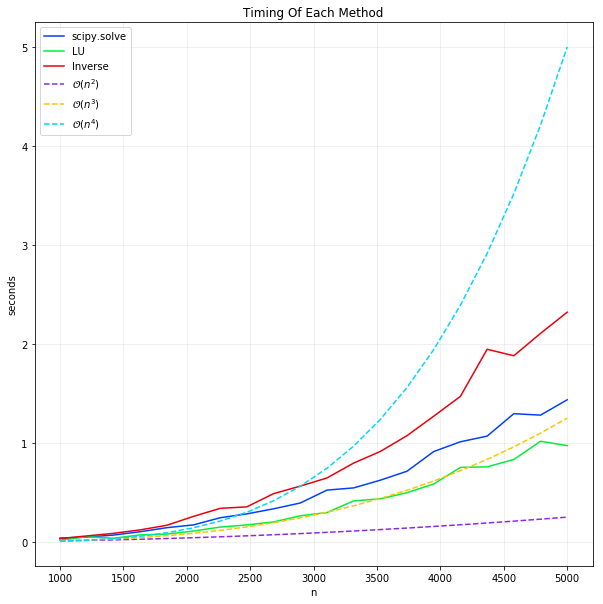

In [24]:
plt.plot(ns, timing[0], label='scipy.solve')
plt.plot(ns, timing[1], label='LU')
plt.plot(ns, timing[2], label='Inverse')
plt.plot(ns, (ns**2)*1e-8, '--', label='$\mathcal{O}(n^2)$')
plt.plot(ns, (ns**3)*1e-11, '--', label='$\mathcal{O}(n^3)$')
plt.plot(ns, (ns**4)*8e-15, '--', label='$\mathcal{O}(n^4)$')
plt.title('Timing Of Each Method')
plt.xlabel('n')
plt.ylabel('seconds')
plt.legend()
plt.show()

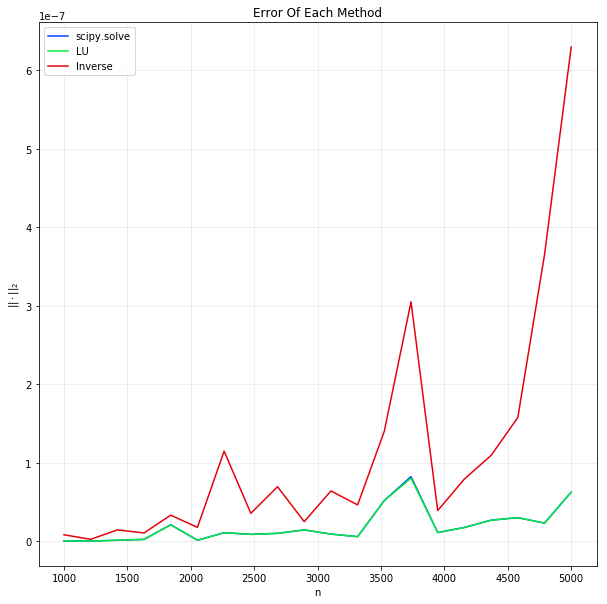

In [25]:
plt.plot(ns, errors[0], label='scipy.solve')
plt.plot(ns, errors[1], label='LU')
plt.plot(ns, errors[2], label='Inverse')
plt.title('Error Of Each Method')
plt.xlabel('n')
plt.ylabel('$||\cdot||_2$')
# plt.yscale('log')
plt.legend()
plt.show()

LU is the fastest, at approximately $\mathcal{O}(n^3)$, and then the built-in solve, and then the inverse, both of which are between $\mathcal{O}(n^3)$ and $\mathcal{O}(n^4)$. The inverse is also numerically unstable, and suffers from larger error than the other two methods.